#  In-class Labexercise
## Case-study 1 ( KNN)

### 1.1 Load the libraries:

In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

### 1.2 Read the dataset(PlayTennis.csv):

In [5]:
df=pd.read_csv("PlayTennis.csv")
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [78]:
df.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Play Tennis    0
dtype: int64

### 1.3 Use the  LabelEncoder(Concerting categarical to Numarical data)

In [16]:
df_new=pd.get_dummies(df)

In [79]:
df_new.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak,Play Tennis_No,Play Tennis_Yes
0,0,0,1,0,1,0,1,0,0,1,1,0
1,0,0,1,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1,0,1
3,0,1,0,0,0,1,1,0,0,1,0,1
4,0,1,0,1,0,0,0,1,0,1,0,1


### 1.4 Extract the independent variable X and dependent variable Y?

In [96]:
x=df_new.drop(['Play Tennis_No','Play Tennis_Yes'],axis=1)
y=df_new[['Play Tennis_No','Play Tennis_Yes']]


### 1.5 Visualize the data:(countplot)

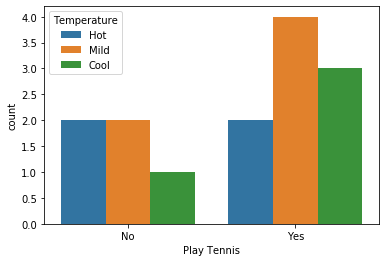

In [97]:
sns.countplot(x='Play Tennis',data=df,hue='Temperature')

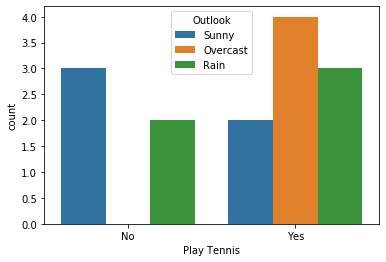

In [98]:
sns.countplot(x=df['Play Tennis'],hue=df['Outlook'])

### 1.6 Split the data into train and test set:(70/30)

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

### 1.7 Train a knn

In [113]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [116]:
model.fit(x_train,y_train)

#print('Prediction : {}'.format(prediction))
print('With KNN (K=3) accuracy score is: ', model.score(x_test,y_test))

With KNN (K=3) accuracy score is:  0.6


### 1.8 Predict the model:

In [117]:
prediction = model.predict(x_test)

### 1.9 Evaluation the model:(classification_report)

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.60      0.75         5

   micro avg       0.60      0.60      0.60         5
   macro avg       0.50      0.30      0.37         5
weighted avg       1.00      0.60      0.75         5
 samples avg       0.60      0.60      0.60         5



C:\Users\Eeshwari\Anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [235]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train, clf=model, legend=2)


ModuleNotFoundError: No module named 'mlxtend'

# Case-study 2  (NB)

### 2.1 Importing the dataset(pima-indians-diabetes.data)

In [200]:
df2=pd.read_csv('diabetes.csv')
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 2.2 Find out the feature columns

In [201]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [202]:
df2.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


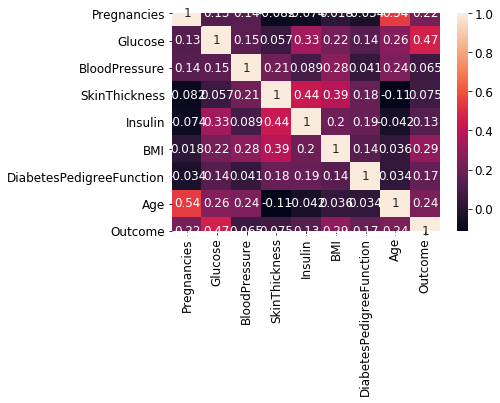

In [203]:
sns.heatmap(df2.corr(),annot=True)

In [204]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']


### 2.3 Extract the independent variable X and dependent variable Y?

In [207]:
X =df2[feature_cols]

y = df2.Outcome

### 2.4 Split the data into train and test set:(70/30)

In [208]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

### 2.5 Train a GaussianNB?

In [209]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


### 2.6 Predict the model:

In [210]:

predicted = model.predict(x_test)


### 2.7 Evaluation the model:(classification_report)

In [211]:
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_test, predicted))
print(accuracy_score(y_test,predicted))


              precision    recall  f1-score   support

           0       0.78      0.86      0.82       157
           1       0.62      0.49      0.55        74

    accuracy                           0.74       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.73      0.74      0.73       231

0.7402597402597403


### 2.8 Conclusion:



### 2.9 Confusion matrix

In [212]:
# this produces a 2x2 numpy array (matrix)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predicted)


array([[135,  22],
       [ 38,  36]], dtype=int64)

### 2.10 what is Basic terminology For Confusion matrix?

True Positives (TP): 

True Negatives (TN):

False Positives (FP): 

* Falsely predict positive

Type I error

False Negatives (FN): 


* Falsely predict negative

Type II error

0: negative class

1: positive class

### 2.11 print the first 25 true and predicted responses

In [213]:
print('True:', y_test.values[0:25])
print('Pred:', predicted[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0]


### 2.12 save confusion matrix and slice into four pieces

In [214]:
confusion = metrics.confusion_matrix(y_test, predicted)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('TP',TP,'TN',TN,'FP',FP)

[[135  22]
 [ 38  36]]
TP 36 TN 135 FP 22


### 2.13 Metrics computed from a confusion matrix

Classification Accuracy: Overall, how often is the classifier correct?

In [215]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, predicted))

0.7402597402597403
0.7402597402597403


Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [216]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, predicted))

0.2597402597402597
0.2597402597402597


Sensitivity: When the actual value is positive, how often is the prediction correct?



In [217]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, predicted))

0.4864864864864865
0.4864864864864865


Specificity: When the actual value is negative, how often is the prediction correct?



In [218]:
specificity = TN / (TN + FP)

print(specificity)

0.8598726114649682


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [219]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.14012738853503184
0.14012738853503182


Precision: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [220]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, predicted))

0.6206896551724138
0.6206896551724138


### 2.14 Adjusting the classification threshold?

In [221]:
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### print the first 10 predicted responses?

In [222]:

model.predict(x_test)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

#### print the first 10 predicted probabilities of class membership

In [223]:
model.predict_proba(x_test)[0:10]

array([[0.0411058 , 0.9588942 ],
       [0.92271694, 0.07728306],
       [0.94147747, 0.05852253],
       [0.21682928, 0.78317072],
       [0.94816153, 0.05183847],
       [0.97689635, 0.02310365],
       [0.17198073, 0.82801927],
       [0.08237856, 0.91762144],
       [0.74548247, 0.25451753],
       [0.48108024, 0.51891976]])

#### print the first 10 predicted probabilities for class 1

In [224]:
model.predict_proba(x_test)[0:10, 1]

array([0.9588942 , 0.07728306, 0.05852253, 0.78317072, 0.05183847,
       0.02310365, 0.82801927, 0.91762144, 0.25451753, 0.51891976])

#### store the predicted probabilities for class 1

In [225]:
c1=model.predict_proba(x_test)[0:10, 1]

#### plot histogram of predicted probabilities

#### create 8 bins

Text(0, 0.5, 'Frequency')

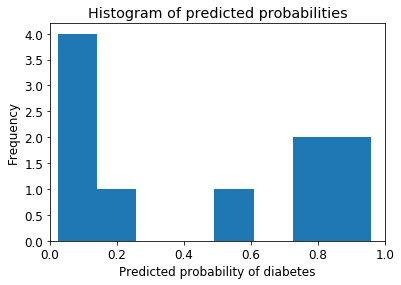

In [226]:
plt.hist(c1, bins=8)

plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

### print the first 10 predicted probabilities

In [227]:
c1[0:10]

array([0.9588942 , 0.07728306, 0.05852253, 0.78317072, 0.05183847,
       0.02310365, 0.82801927, 0.91762144, 0.25451753, 0.51891976])

### create new confusion matrix 

In [228]:
from sklearn.preprocessing import binarize


print(metrics.confusion_matrix(y_test, predicted))


[[135  22]
 [ 38  36]]


### 2.14 Receiver Operating Characteristic (ROC) Curves

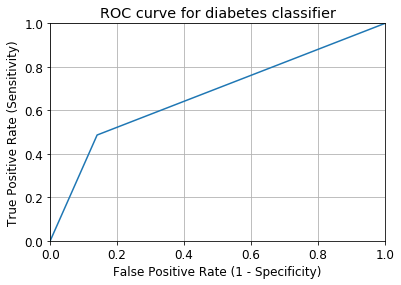

In [229]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


#### define a function that accepts a threshold and prints sensitivity and specificity

In [230]:
def threshold(t):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
    


In [233]:
print(metrics.roc_auc_score(y_test, predicted))

0.6731795489757274


# 3. What is advantages Confusion matrix and ROC/AUC?

confusion matrix: Allows you to calculate a variety of metrics
Useful for multi-class problem

ROC/AUC:Does not require you to set a classification threshold
Still useful when there is high class imbalance